# Introduction
India is rightly called the Land of Spices. No country in the world produces as many varieties of spices as India.According to Indian Food Theory, our food has 6 different flavours: sweet, salty, bitter, sour, astringent and spicy.Surely when you come to India you will be fascinated by its food and find best Indian cusine providing restraunts.

So in this project we will be finding all the top Indian cusine restraunts in the capital of delhi for the tourists.

# Data
For this project the required data is as follows

The data set of delhi which contains its neighbourhoods , latitude, longitudes is as follows through a csv file named delhi_dataset.csv from kaggle https://www.kaggle.com/shaswatd673/delhi-neighborhood-data/version/1#delhi_dataSet.csv
then we will use foursquare for extracting the data of all the restraunts in delhi especially the restraunts providing the Indian cusine
• Data will be collected from the csv file and cleaned and processed into a dataframe.

• FourSquare be used to locate all venues and then filtered by Indian restaurants. Ratings, tips, and likes by users will be counted and added to the dataframe.

• Data will be sorted based on rankings

• Finally, the data be will be visually assessed using graphing from various Python libraries.

## lets start

In [6]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: / 

In [80]:
#importing the libraries 
import random
from IPython.display import Image 
from IPython.core.display import HTML 
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
#!conda install -c conda-forge folium=0.5.0 --yes
import folium 
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns
from pandas.io.json import json_normalize
print('Done!')

Done!


### Importing my data set

In [81]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_97dd3797a4424cf69cb3085f1a5298b4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='IdYhW2dhbQ6z6tjpW2x_EC_uQEUdvP4eqsQcEAUmX2QH',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_97dd3797a4424cf69cb3085f1a5298b4.get_object(Bucket='courseracapstone-donotdelete-pr-ia4ihpnxp611nv',Key='delhi_dataSet.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df = pd.read_csv(body)
df.head()

,Unnamed: 0,Borough,Neighborhood,latitude,longitude
0,0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,2,North West Delhi,Azadpur,28.707657,77.175547
3,3,North West Delhi,Bawana,28.799660,77.032885
4,4,North West Delhi,Begum Pur,NaN,NaN


In [82]:
df.drop(['Unnamed: 0'] , axis=1 , inplace=True)

### cleansing the data 

In [83]:
df=df.dropna()#droping the nan cells 






In [84]:
print(df.shape)

(163, 4)


### visualizing the data frame 

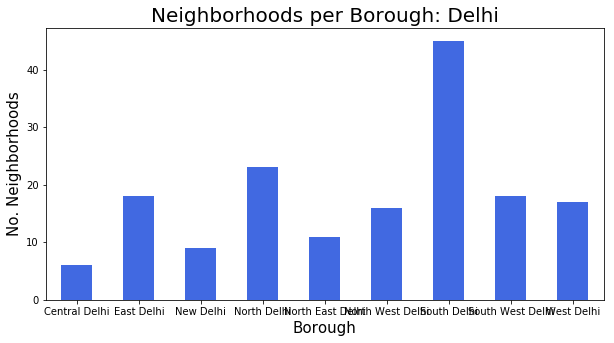

In [85]:
clr='royalblue'
df.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: Delhi', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [86]:
def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    venue_data = requests.get(url).json()['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [87]:
CLIENT_ID='TNX3U5JXYDBJMTEQDP5FJBZH01GA5AZE5RWXVS1PQWIKQKCE'
CLIENT_SECRET='034K5ZCN4XZKAR02VBWKL1VPJPNHO0KRW5K3KA3LWBDV11OQ'
VERSION='20180605'

In [88]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
rest=pd.DataFrame(columns=column_names)
count=1
for row in df.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(df),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    print(row)
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        rest=rest.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 163 ) Indian Resturants in Adarsh Nagar, North West Delhi:0
['North West Delhi', 'Adarsh Nagar', 28.614192499999998, 77.0715411848447]
( 2 / 163 ) Indian Resturants in Ashok Vihar, North West Delhi:0
['North West Delhi', 'Ashok Vihar', 28.6994533, 77.1848256]
( 3 / 163 ) Indian Resturants in Azadpur, North West Delhi:0
['North West Delhi', 'Azadpur', 28.707656800000002, 77.1755473]
( 4 / 163 ) Indian Resturants in Bawana, North West Delhi:0
['North West Delhi', 'Bawana', 28.79966, 77.03288470000001]
( 5 / 163 ) Indian Resturants in Dhaka, North West Delhi:0
['North West Delhi', 'Dhaka', 39.0317139, -90.2612233]
( 6 / 163 ) Indian Resturants in Jahangirpuri, North West Delhi:0
['North West Delhi', 'Jahangirpuri', 28.7259717, 77.162658]
( 7 / 163 ) Indian Resturants in Karala, North West Delhi:0
['North West Delhi', 'Karala', 28.73514, 77.0325105]
( 8 / 163 ) Indian Resturants in Keshav Puram, North West Delhi:0
['North West Delhi', 'Keshav Puram', 28.688926399999996, 77.1616832999

( 67 / 163 ) Indian Resturants in East Vinod Nagar, East Delhi:0
['East Delhi', 'East Vinod Nagar', 28.622766100000003, 77.30750350000001]
( 68 / 163 ) Indian Resturants in Gandhi Nagar, East Delhi:0
['East Delhi', 'Gandhi Nagar', 39.0317139, -90.2612233]
( 69 / 163 ) Indian Resturants in Geeta Colony, East Delhi:0
['East Delhi', 'Geeta Colony', 28.65010115, 77.27592089582271]
( 70 / 163 ) Indian Resturants in Jhilmil Colony, East Delhi:0
['East Delhi', 'Jhilmil Colony', 28.669814199999998, 77.3072827]
( 71 / 163 ) Indian Resturants in Krishna Nagar, East Delhi:0
['East Delhi', 'Krishna Nagar', 28.5637017, 77.1934097649498]
( 72 / 163 ) Indian Resturants in Laxmi Nagar, East Delhi:0
['East Delhi', 'Laxmi Nagar', 28.6303085, 77.2775633]
( 73 / 163 ) Indian Resturants in Mayur Vihar, East Delhi:0
['East Delhi', 'Mayur Vihar', 28.6131071, 77.29572209999999]
( 74 / 163 ) Indian Resturants in Pandav Nagar, East Delhi:0
['East Delhi', 'Pandav Nagar', 28.6501272, 77.1532783]
( 75 / 163 ) Indi

( 134 / 163 ) Indian Resturants in Kishangarh Village, South West Delhi:0
['South West Delhi', 'Kishangarh Village', 28.5194277, 77.16653509999999]
( 135 / 163 ) Indian Resturants in Mahipalpur, South West Delhi:1
['South West Delhi', 'Mahipalpur', 28.5444849, 77.1256912]
( 136 / 163 ) Indian Resturants in Moti Bagh, South West Delhi:0
['South West Delhi', 'Moti Bagh', 28.5778787, 77.1741797]
( 137 / 163 ) Indian Resturants in Munirka, South West Delhi:1
['South West Delhi', 'Munirka', 28.554886, 77.17108409999999]
( 138 / 163 ) Indian Resturants in Najafgarh, South West Delhi:0
['South West Delhi', 'Najafgarh', 28.612303999999998, 76.98239079999999]
( 139 / 163 ) Indian Resturants in Naraina, South West Delhi:0
['South West Delhi', 'Naraina', 28.622054700000003, 77.1386441]
( 140 / 163 ) Indian Resturants in Palam, South West Delhi:0
['South West Delhi', 'Palam', 28.5671733, 77.13403170000001]
( 141 / 163 ) Indian Resturants in Rama Krishna Puram, South West Delhi:0
['South West Delhi

In [89]:
print(rest.shape)
rest.head()

(89, 4)


,Borough,Neighborhood,ID,Name
0,North West Delhi,Kohat Enclave,4cd585d294848cfacfe5e6b1,Peshawari
1,North West Delhi,Kohat Enclave,511f9560e4b04843198638be,Bobby Punjabi Rasoi
2,North West Delhi,Kohat Enclave,4f2652f8e4b0008744333f06,Sita Ram Diwan Chand Chhole Bhature
3,North West Delhi,Kohat Enclave,5b75b20bbb8d36002d6e9fc2,Sankalp Restaurant
4,North West Delhi,Pitam Pura,515314eae4b0054682512620,Angrezee Dhaba


In [90]:
rest.to_csv('indian_rest_delhi_tocsv1.csv')#downloading the csv file so far because of limited calls in foursquare API

### plotting the data 

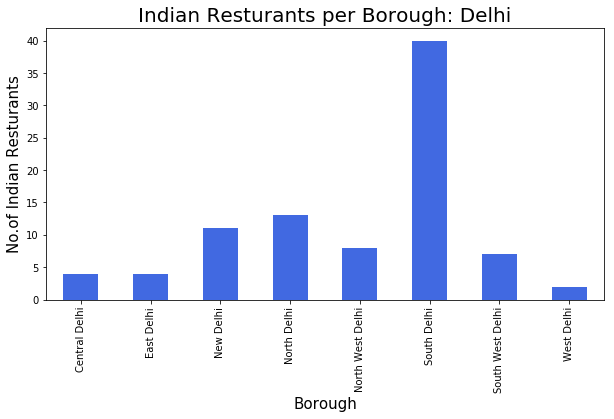

In [91]:
rest.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Indian Resturants per Borough: Delhi', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Indian Resturants', fontsize=15)
plt.xticks()
plt.show()

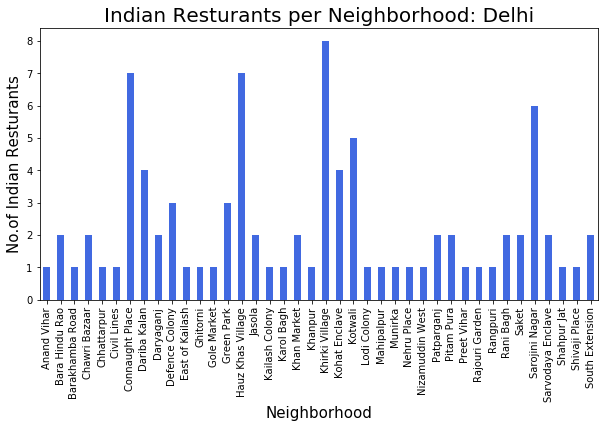

In [92]:
rest.groupby('Neighborhood')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Indian Resturants per Neighborhood: Delhi', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No.of Indian Resturants', fontsize=15)
plt.xticks()
plt.show()

In [93]:
rest[rest['Neighborhood']=='Khirki Village']   ###write the neighborhood 

,Borough,Neighborhood,ID,Name
59,South Delhi,Khirki Village,4f5c8cf6e4b086681c1463df,Khan Chacha
60,South Delhi,Khirki Village,4bcb2302937ca59317e5a892,The Punjab Grill
61,South Delhi,Khirki Village,4cfb6041d8468cfad158f46b,Spice Market
62,South Delhi,Khirki Village,518d1338498e9eba21ec9c00,Barbeque Nation Saket
63,South Delhi,Khirki Village,51f55a91498e4a9a1d319b34,Gulati Spice Market
64,South Delhi,Khirki Village,529f4f1d498e9081593a1dbe,Dhaba by Claridges
65,South Delhi,Khirki Village,4bc47feeabf495213315c593,Sattvik
66,South Delhi,Khirki Village,4eb56359b634a0486020d217,Parathe Hi Parathe


### ranking each of the restraunts for future analysis

def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
rest_stats=pd.DataFrame(columns=column_names)
count=1
for row in rest.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id_c,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(rest),')','processed')
    rest_stats = rest_stats.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id_c,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

# conclusion 

 hence we got all the top rated 